In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as statistics

In [2]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [3]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [4]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [5]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [6]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [7]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [8]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [9]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [10]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs = [None]*20
past_costs_test = [None]*20
precision = 0.000001
eta = 0.01
iterations = 2000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs[i], past_costs_test[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    training_gd=[]
    training_gd.append("Training")
    testing_gd=[]
    testing_gd.append("Testing")
    
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%50==0:
            training_gd.append(past_rmse_train_grad_desc[i][x]) 
            testing_gd.append(past_rmse_test_grad_desc[i][x])
    
    for c1, c2 in zip(training_gd, testing_gd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")

Error values (every 50th iteration) for model number 1 :-

Training                                 Testing
1.524361438931178                        1.570309279883524
1.1514213580424055                       1.2169789726801041
0.9955204422877                          1.0777891835864304
0.9371614562475713                       1.0299345722846653
0.9165523017095738                       1.0152236362946363
0.9094255456918396                       1.011359858815704
0.9069701727760744                       1.0107354184852069
0.9061215884975319                       1.0109309826591482
0.9058266248636067                       1.0112386665137683
0.9057233937261279                       1.0114860735948532


Error values (every 50th iteration) for model number 2 :-

Training                                 Testing
1.1785755451422704                       1.2164220486802944
1.0301058752294616                       1.064489297728636
0.969847083294035                        1.000165584604265
0.9467

Error values (every 50th iteration) for model number 19 :-

Training                                 Testing
1.176531687001262                        1.1838789458975427
1.019918571363947                        1.0445381246509011
0.9611051071087583                       0.9907740765614098
0.9402346596694676                       0.9705926040287987
0.9329808380556971                       0.9629203080732017
0.9304709687806305                       0.9598919207233974
0.929601195736994                        0.9586309753072522
0.9292987214125081                       0.9580723258130708
0.9291931080082381                       0.9578087469620366


Error values (every 50th iteration) for model number 20 :-

Training                                 Testing
1.572356189536907                        1.535531184230875
1.1873550242093636                       1.1943835704194523
1.0197699908717945                       1.0554883480709738
0.9541259341074244                       1.005963895581195
0.

Model number  1 :


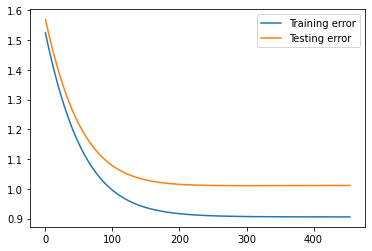

Model number  2 :


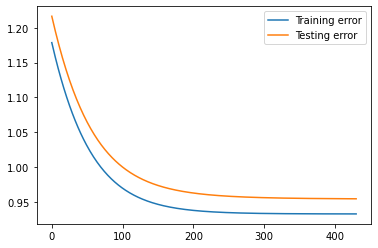

Model number  3 :


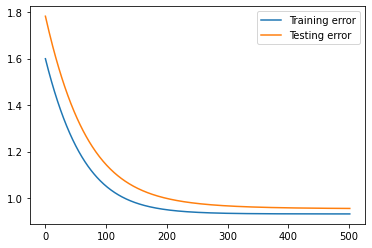

Model number  4 :


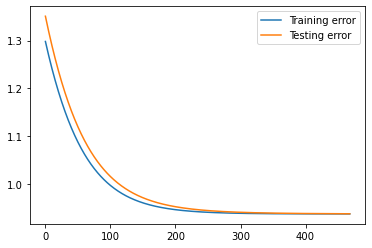

Model number  5 :


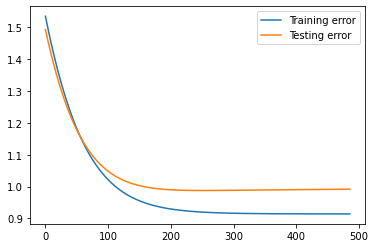

Model number  6 :


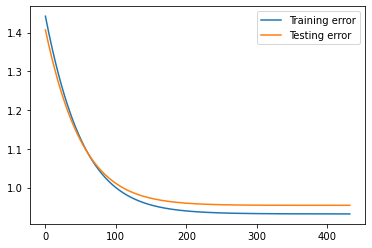

Model number  7 :


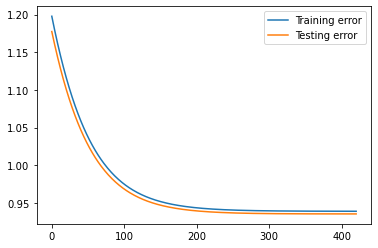

Model number  8 :


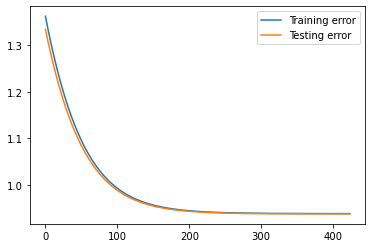

Model number  9 :


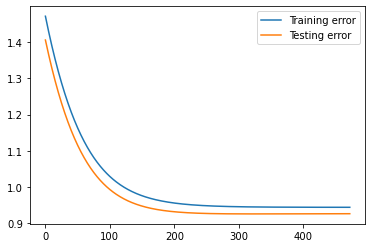

Model number  10 :


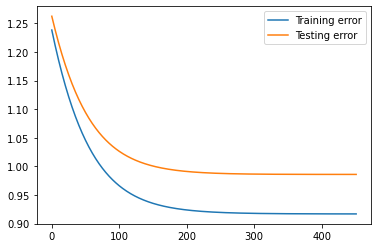

Model number  11 :


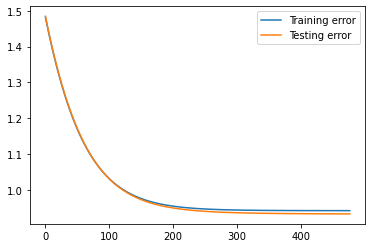

Model number  12 :


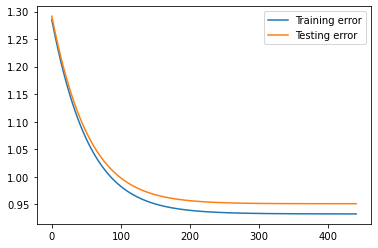

Model number  13 :


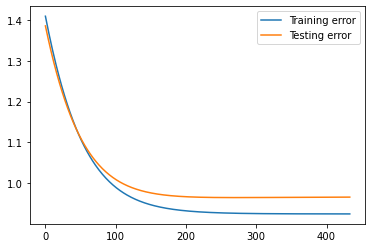

Model number  14 :


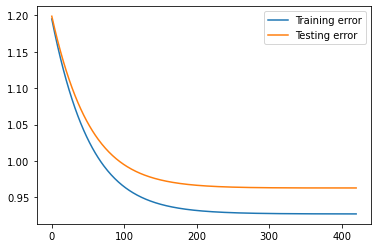

Model number  15 :


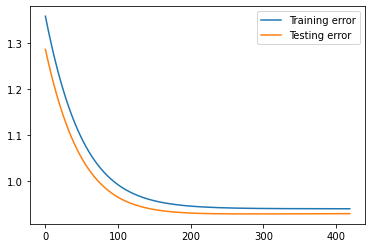

Model number  16 :


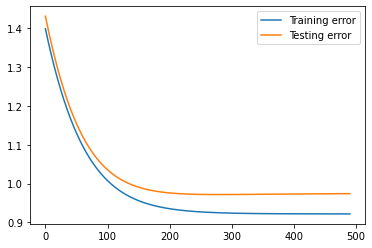

Model number  17 :


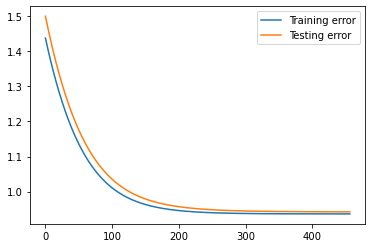

Model number  18 :


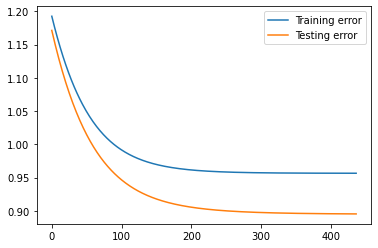

Model number  19 :


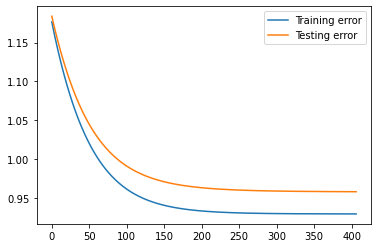

Model number  20 :


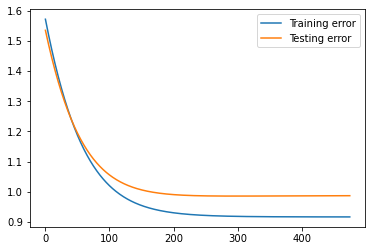

In [11]:
# Plotting training VS testing error for all 20 models for GD
for x in range(20):
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_grad_desc[x], label="Training error")
    plt.plot(past_rmse_test_grad_desc[x], label="Testing error")
    plt.legend()
    plt.show()

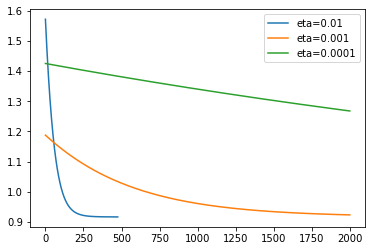

In [12]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.001
eta3=0.0001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_grad_desc[19], label="eta=0.01")
plt.plot(past_rmse_train_grad_desc2, label="eta=0.001")
plt.plot(past_rmse_train_grad_desc3, label="eta=0.0001")
plt.legend()


In [13]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        np.random.shuffle(x)
        mse = 0
        for j in range(x.shape[0]):
            row_j = np.matrix(x[j])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y[j])
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_train = np.matmul(x, theta)-y
        cost_train = (1/(2*m))*(np.matmul(diff_train.T, diff_train))
        cost_train_val = np.array(cost_train)[0][0]
        past_costs_train.append(cost_train_val)
        past_rmse_train.append(np.sqrt(2*cost_train_val))
        
        diff_test = np.matmul(x_test,theta) - y_test
        mse_test = (1/(2*n))*(np.matmul(diff_test.T, diff_test))
        mse_test_val = np.array(mse_test)[0][0]
        past_costs_test.append(mse_test_val)
        past_rmse_test.append(np.sqrt(2*mse_test_val))
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test   

            

In [14]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 200
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = stoch_grad(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    #printing error values for learning rate=0.01 , 20 models.
    training_sgd=[]
    training_sgd.append("Training")
    testing_sgd=[]
    testing_sgd.append("Testing")
    
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%50==0:
            training_sgd.append(past_rmse_train_sgd[i][x]) 
            testing_sgd.append(past_rmse_test_sgd[i][x])
    
    for c1, c2 in zip(training_sgd, testing_sgd):
        print ("%-40s %s" % (c1, c2))         
    print("\n")


Error values (every 50th iteration) for model number 1 :-

Training                                 Testing
1.1342224779516172                       1.049577552919994
0.96157110768708                         1.0792408354709313
0.9626689097997542                       1.0882612743028497
0.9620778102015906                       1.0780278895341604


Error values (every 50th iteration) for model number 2 :-

Training                                 Testing
1.0939901550896616                       1.01042049953261
1.0086993119417162                       0.9882044962782872
1.0128593817113973                       0.9666547497924654
1.012336936474979                        0.9745576580207862


Error values (every 50th iteration) for model number 3 :-

Training                                 Testing
1.1390622685209344                       1.0044853363959416
1.0032298092016692                       0.993329868587279
1.0027344805215896                       0.9904139295123646
1.00168610617043

Model number  1 :


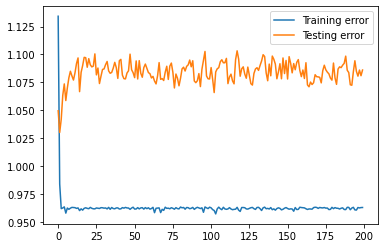

Model number  2 :


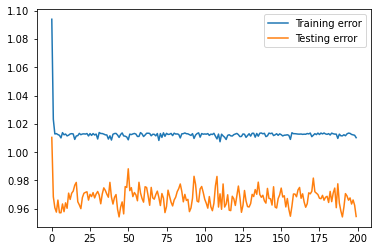

Model number  3 :


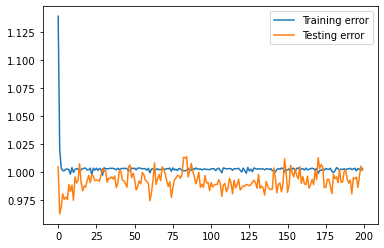

Model number  4 :


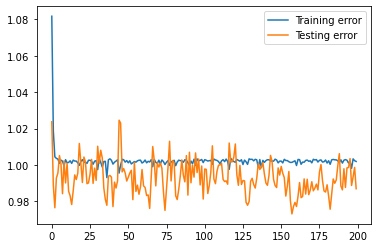

Model number  5 :


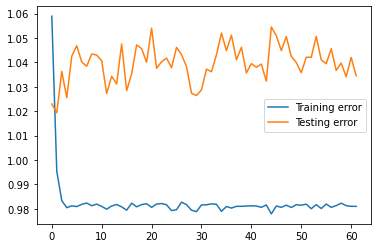

Model number  6 :


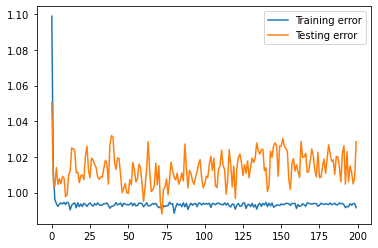

Model number  7 :


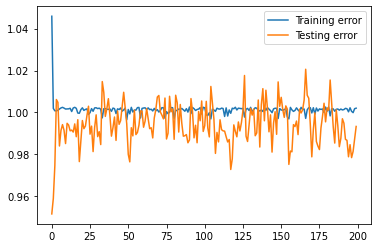

Model number  8 :


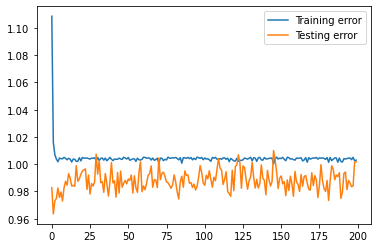

Model number  9 :


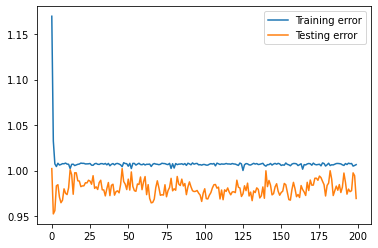

Model number  10 :


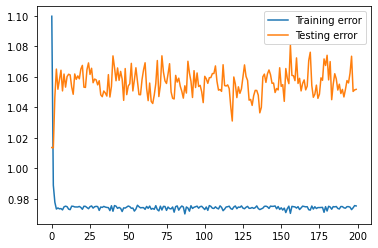

Model number  11 :


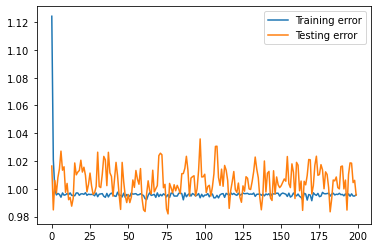

Model number  12 :


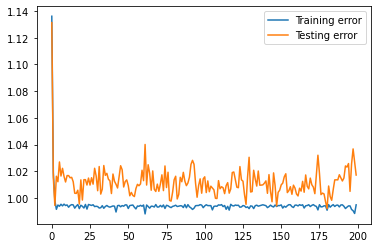

Model number  13 :


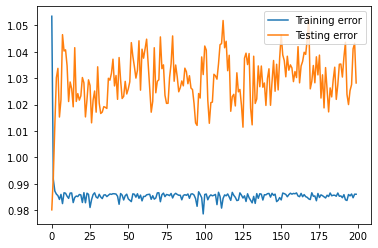

Model number  14 :


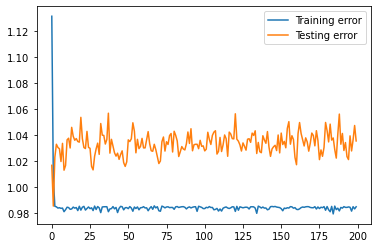

Model number  15 :


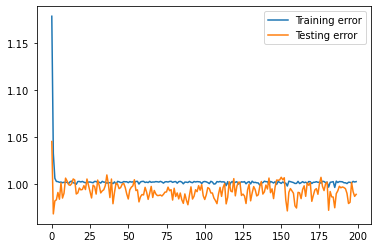

Model number  16 :


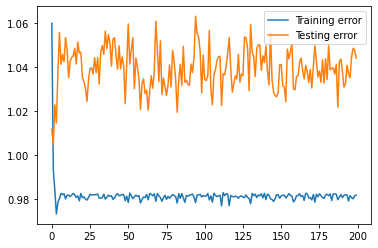

Model number  17 :


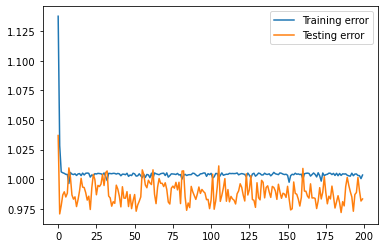

Model number  18 :


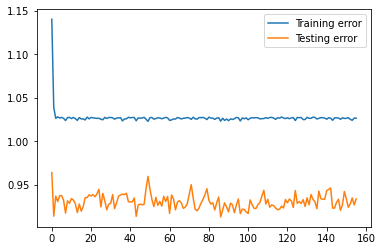

Model number  19 :


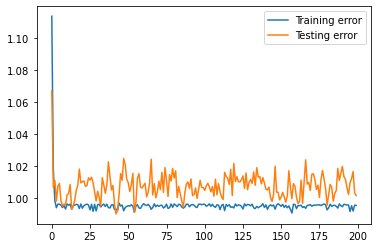

Model number  20 :


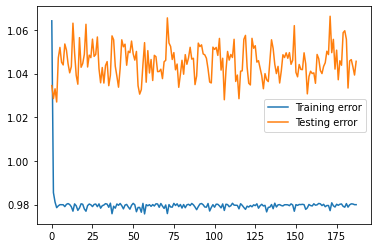

In [15]:
# Plotting training VS testing error for all 20 models for SGD
for x in range(20):
    
    plt.figure()
    print("Model number ",x+1,":")
    plt.plot(past_rmse_train_sgd[x], label="Training error")
    plt.plot(past_rmse_test_sgd[x], label="Testing error")
    plt.legend()
    plt.show()

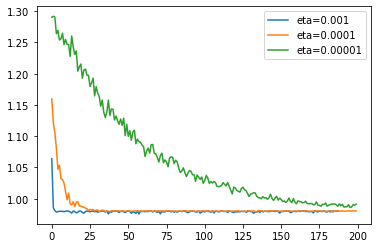

In [16]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.0000001
eta2=0.0001
eta3=0.00001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_sgd[19], label="eta=0.001")
plt.plot(past_rmse_train_sgd2, label="eta=0.0001")
plt.plot(past_rmse_train_sgd3, label="eta=0.00001")
plt.legend()

In [17]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.905667,0.905719,0.962975,1.011930,1.011502,1.086058
2,0.932959,0.933012,1.010214,0.954311,0.954696,0.954481
3,0.932001,0.932057,1.002922,0.954191,0.955569,1.001446
4,0.938067,0.938124,1.001937,0.937972,0.938415,0.986970
5,0.914117,0.914171,0.980977,0.992840,0.991853,1.034542
6,0.931846,0.931894,0.991517,0.954277,0.954148,1.028525
7,0.938996,0.939047,1.002003,0.935548,0.935534,0.993272
8,0.938291,0.938340,1.002997,0.937745,0.937676,1.001797
9,0.943130,0.943184,1.006468,0.925823,0.925431,0.969292
10,0.916734,0.916791,0.975257,0.985936,0.985916,1.051692


In [18]:
#Trying to compare the algorithms
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training minimums ':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing minimums':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training minimums,Number of testing minimums
NE,20,7
GD,0,13
SGD,0,0


In [19]:
#Printing the training mean and variance as well as the testing mean and variance across the 3 algorithms
mean_NE_train=statistics.mean(training_err_norm)
variance_NE_train=statistics.variance(training_err_norm)
mean_GD_train=statistics.mean(min_rmse_train_table_gd)
variance_GD_train=statistics.variance(min_rmse_train_table_gd)
mean_SGD_train=statistics.mean(min_rmse_train_table_sgd)
variance_SGD_train=statistics.variance(min_rmse_train_table_sgd)

mean_NE_test=statistics.mean(testing_err_norm)
variance_NE_test=statistics.variance(testing_err_norm)
mean_GD_test=statistics.mean(min_rmse_test_table_gd)
variance_GD_test=statistics.variance(min_rmse_test_table_gd)
mean_SGD_test=statistics.mean(min_rmse_test_table_sgd)
variance_SGD_test=statistics.variance(min_rmse_test_table_sgd)

error_stats = {'Training mean error':[mean_NE_train, mean_GD_train, mean_SGD_train], 'Testing mean error':[mean_NE_test, mean_GD_test, mean_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

error_stats = {'Training variance error':[variance_NE_train, variance_GD_train, variance_SGD_train], 'Testing variance error':[variance_NE_test, variance_GD_test, variance_SGD_test]}
df = pd.DataFrame(error_stats,index=['NE','GD','SGD'])
display(df) 

,Training mean error,Testing mean error
NE,0.930943,0.954534
GD,0.930996,0.954491
SGD,0.994463,1.009110


,Training variance error,Testing variance error
NE,0.000141,0.000739
GD,0.000141,0.000725
SGD,0.000207,0.001306
